In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("C:\\Users\\Myesha\\Desktop\\SampleSuperstore.csv")

In [2]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.duplicated().sum()

17

In [4]:
data.drop_duplicates(keep="first",inplace=True)
data.shape

(9977, 13)

In [5]:
code = ['Postal Code']
data1 = data.drop(columns=code,axis=1)
print('Mean and Standard Deviation of Data')
data1.describe()


Mean and Standard Deviation of Data


,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [6]:
print('Correlation')
correlation = data1.corr()
correlation

Correlation


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


In [7]:
print('Covariance')
Covariance = data1.cov()
Covariance

Covariance


,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


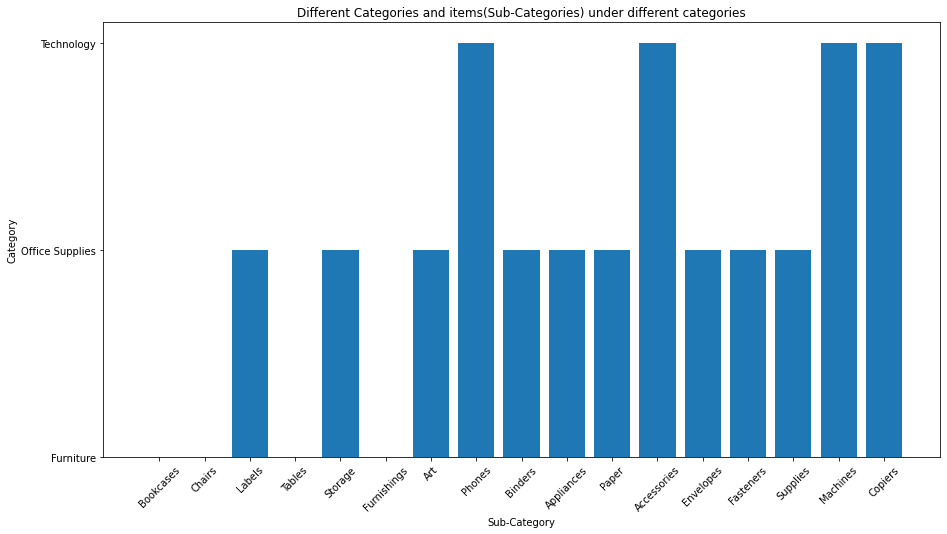

In [8]:
#Different Categories and items(sub-category) under different categories
plt.figure(figsize=(15,8))
plt.bar('Sub-Category', 'Category', data=data1)
plt.title('Different Categories and items(Sub-Categories) under different categories')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

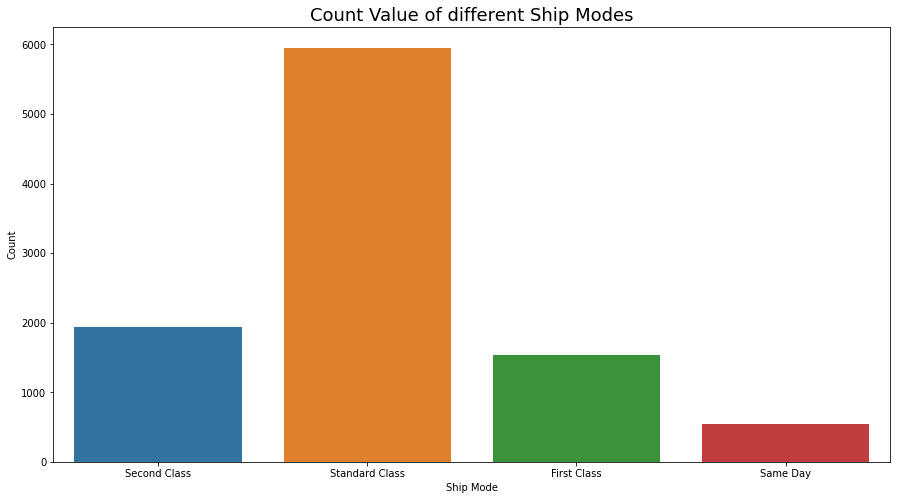

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(x=data1['Ship Mode'])
plt.title('Count Value of different Ship Modes', fontsize=18)
plt.xlabel('Ship Mode', fontsize=10)

plt.ylabel('Count', fontsize=10)
plt.show()

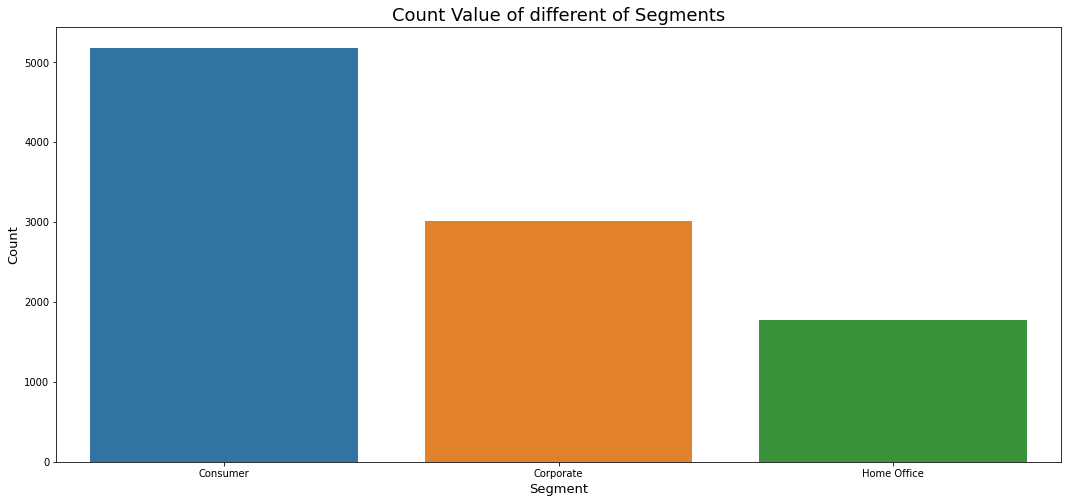

In [10]:
plt.figure(figsize=(18,8))
sns.countplot(x=data['Segment'])
plt.title('Count Value of different of Segments', fontsize=18)
plt.xlabel('Segment', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

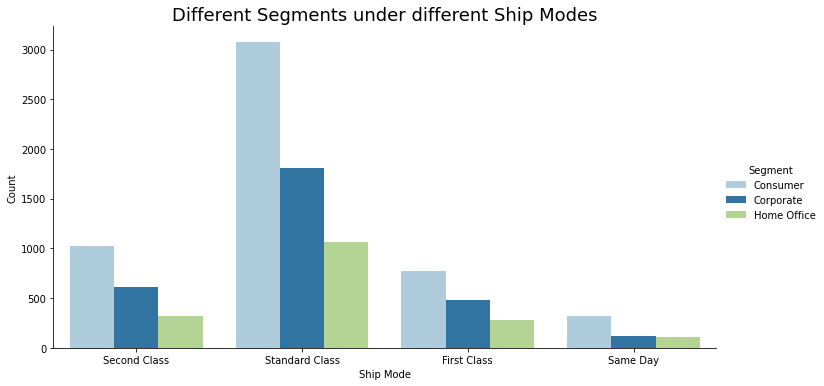

In [11]:
sns.catplot("Ship Mode", hue="Segment", data=data1, kind="count", aspect=2, palette="Paired")
plt.title('Different Segments under different Ship Modes', fontsize=18)
plt.xlabel('Ship Mode', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

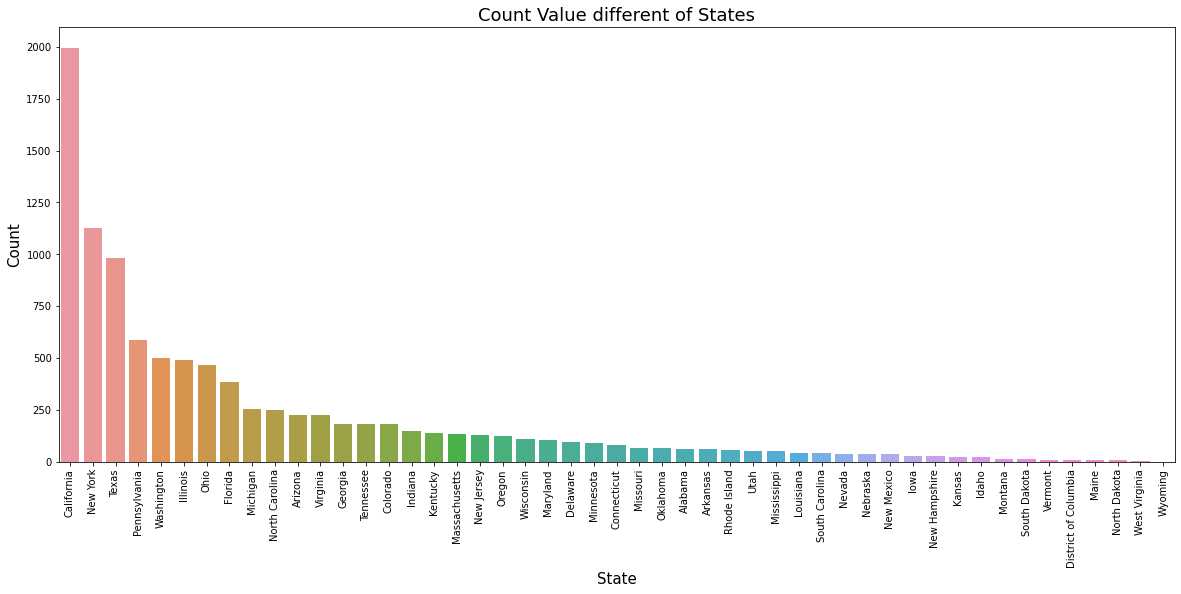

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['State'], order=data['State'].value_counts().index)
plt.title('Count Value different of States', fontsize=18)
plt.xlabel('State', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
plt.show()

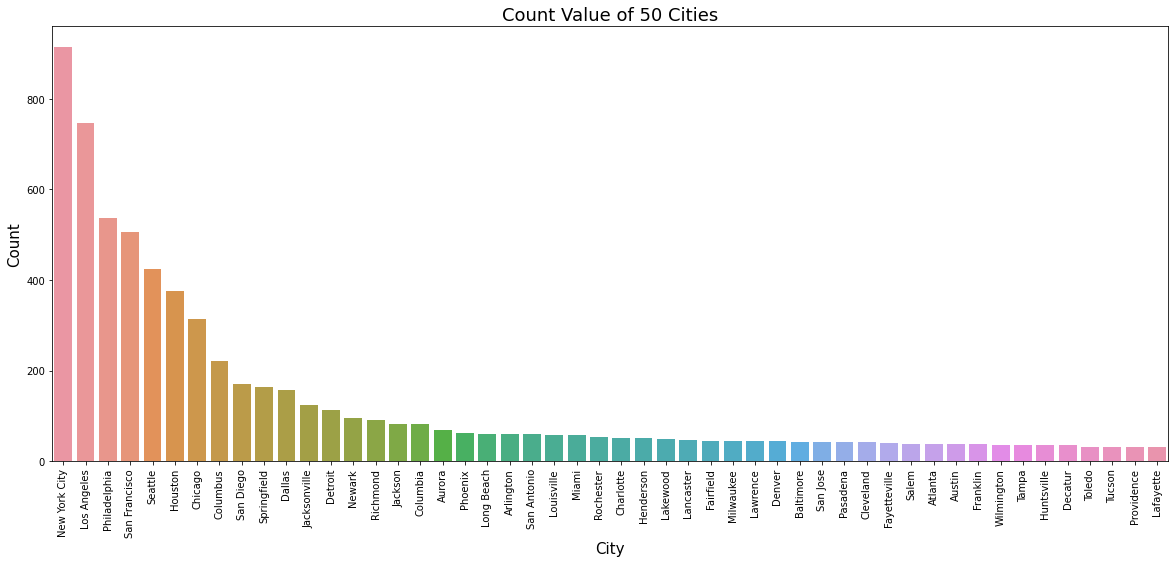

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['City'], order=(data['City'].value_counts().head(50)).index)
plt.title('Count Value of 50 Cities', fontsize=18)
plt.xlabel('City', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
plt.show()

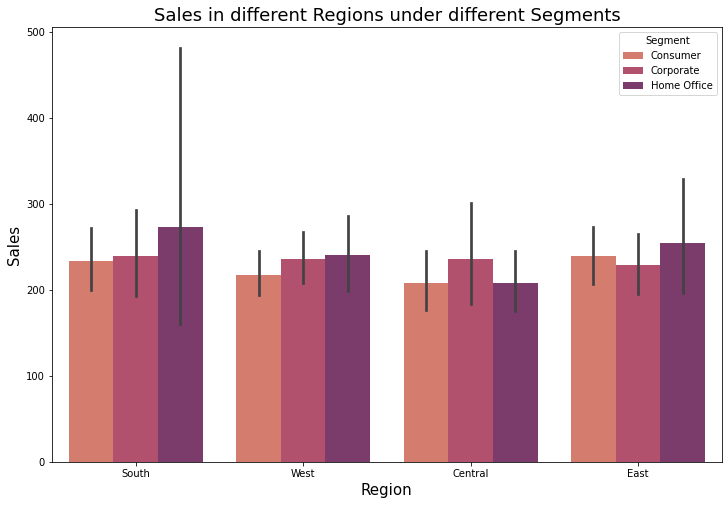

In [14]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=data1, palette="flare")
plt.title('Sales in different Regions under different Segments', fontsize=18)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.show()

We can see from the above graph that the sales in South region under Home Office segment is the highest and sales in Central region under consumer and corporate is the lowest. So organization should focus more on their weak area which is Consumer and Coporate segment under Central region

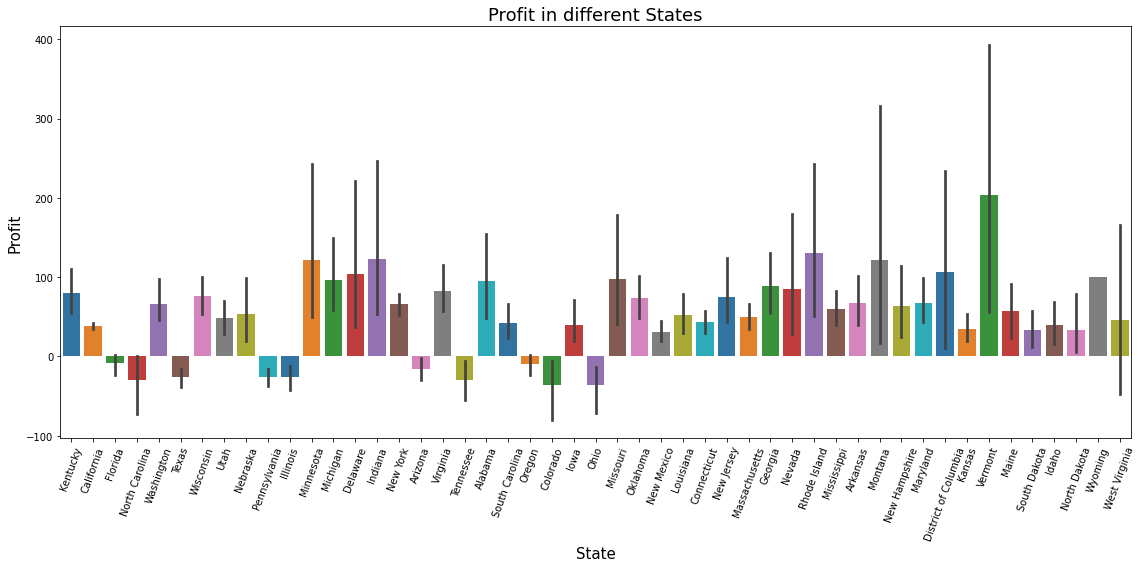

In [15]:
plt.figure(figsize=[16,8])

pl = sns.barplot(x="State", y="Profit", data=data1, palette="tab10")
plt.title('Profit in different States', fontsize=18)
plt.xlabel('State', fontsize=15)
plt.ylabel('Profit', fontsize=15)
plt.xticks(rotation=70, fontsize=10)
plt.tight_layout()
plt.show()

From the above Graph we can conclude that the top 3 highest profit making states are : 1. Vermont 2.Rhode Island  and 3. Montana 

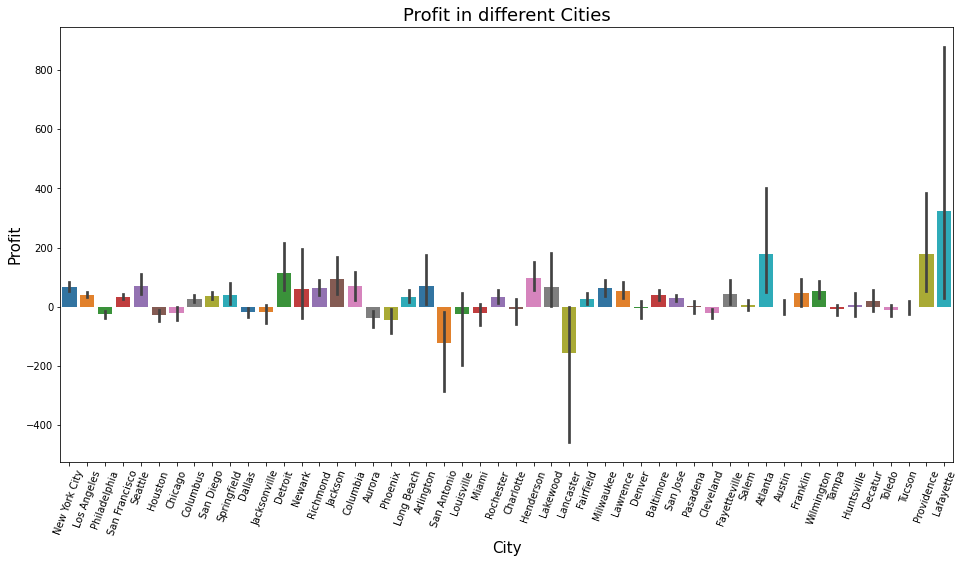

In [16]:
plt.figure(figsize=[16,8])

pl = sns.barplot(x="City", y="Profit", data=data1, palette="tab10", order=(data['City'].value_counts().head(50)).index)
plt.title('Profit in different Cities', fontsize=18)
plt.xlabel('City', fontsize=15)
plt.ylabel('Profit', fontsize=15)
plt.xticks(rotation=70, fontsize=10)

plt.show()

From the above Graph we can conclude that the top 3 highest profit making cities are : Atlanta, Providence and Detroit.

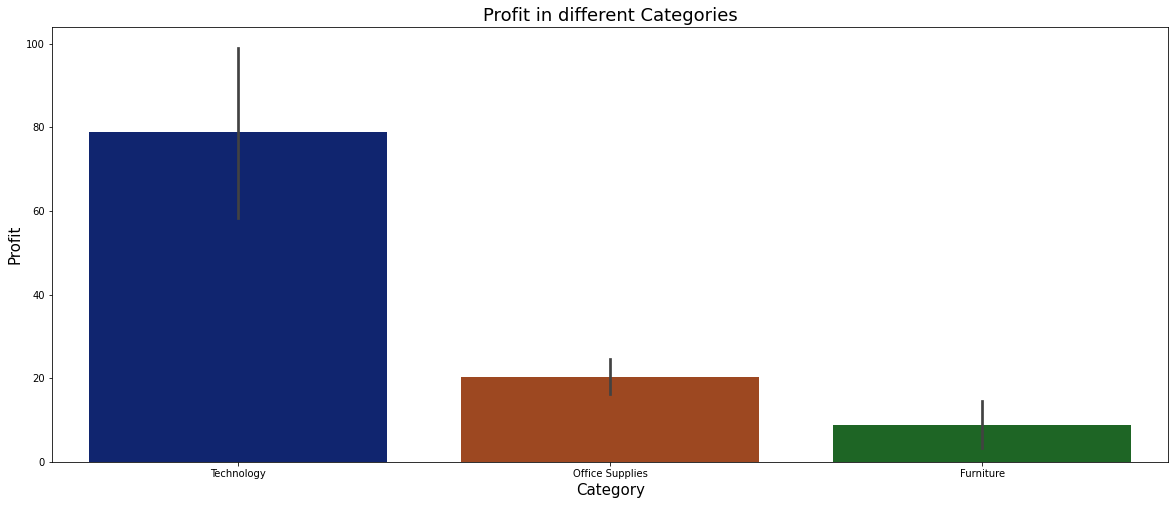

In [17]:
plt.figure(figsize=[20,8])
plot_order1 = data1.groupby('Category')['Profit'].sum().sort_values(ascending=False).index.values
lt = sns.barplot(x="Category", y="Profit", data=data1, palette="dark", order=plot_order1)
plt.title('Profit in different Categories', fontsize=18)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Profit', fontsize=15)
plt.show()

We can see from the above graph that Profit in Technology category is the highest and Profit in Furniture category is lowest. So organization should focus more on Furniture category. 

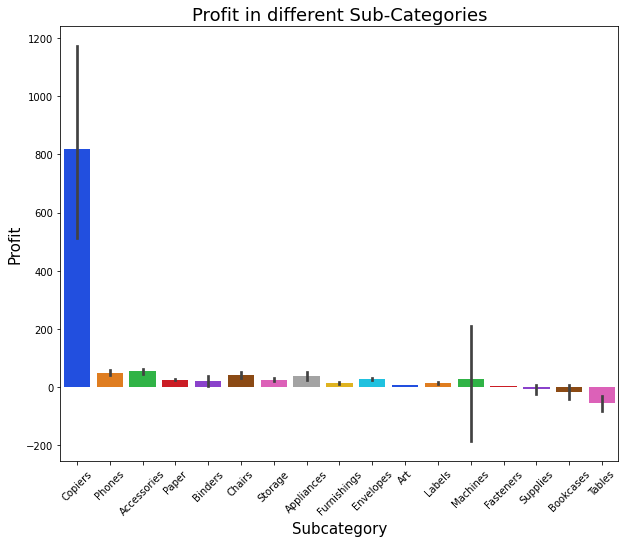

In [18]:
plt.figure(figsize=[10,8])
plot_order4 = data1.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).index.values
ax = sns.barplot(x="Sub-Category", y="Profit", data=data1, palette="bright", order=plot_order4)
plt.title('Profit in different Sub-Categories', fontsize=18)
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=45)
plt.show()

We can see from the above graph that majority of the firm's profit is coming through Copiers whereas Tables are hardly brining any profit, infact company is facing losses due to tables, so company should decide whether they want to continue selling tables or not.

As in Category, the highest profit is in technology, so we will analyze all sub categories of Technology


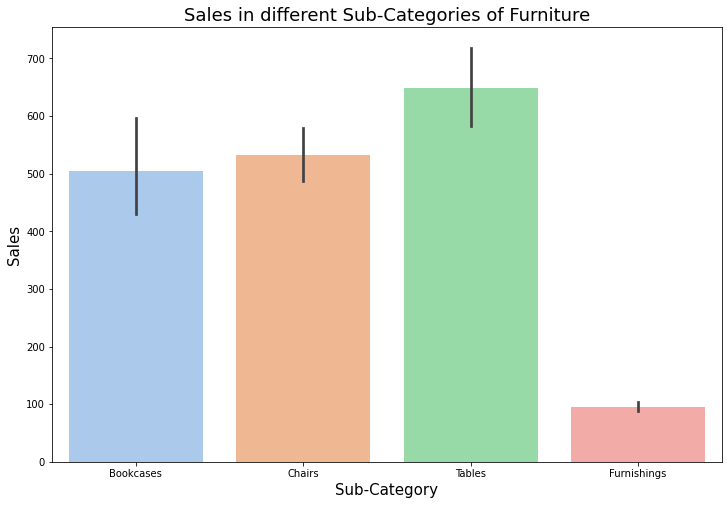

In [19]:
print('As in Category, the highest profit is in technology, so we will analyze all sub categories of Technology')
data2=data1[(data1['Category']=="Furniture")]
plt.figure(figsize=[12,8])

sns.barplot(x="Sub-Category", y="Sales", data=data2, palette="pastel")
plt.title('Sales in different Sub-Categories of Furniture', fontsize=18)
plt.xlabel("Sub-Category",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.show()

Since the sales of furnishings is the lowest under Furniture category, company should take up policies to improve the sales of furnishings, also, as the sales of tables is highest but profit through tables is the lowest, company should increase the sales price of tables, to increase their profit.

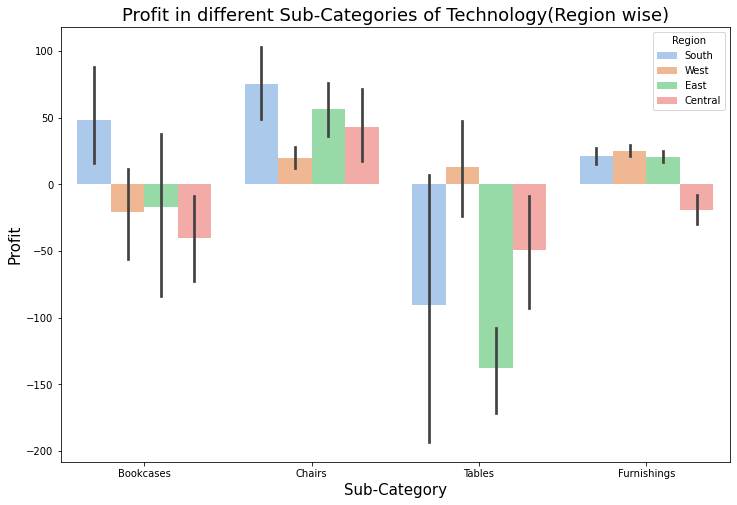

In [20]:
plt.figure(figsize=[12,8])
sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=data2, palette="pastel")
plt.title('Profit in different Sub-Categories of Technology(Region wise)', fontsize=18)
plt.xlabel("Sub-Category",fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.show()

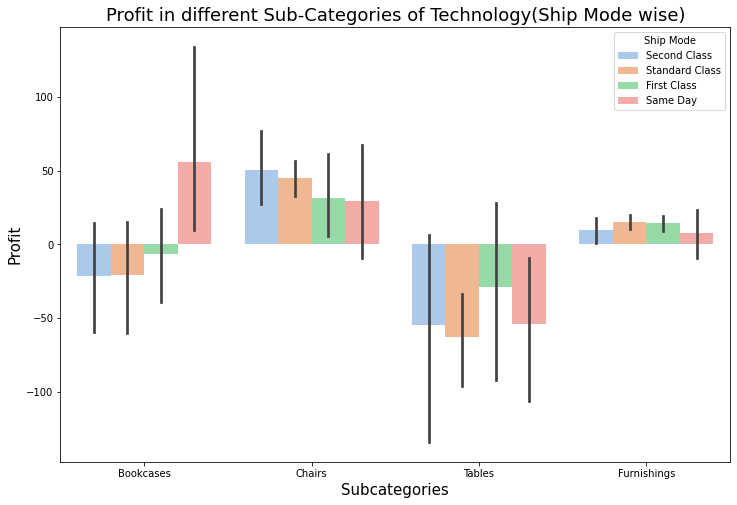

In [21]:
plt.figure(figsize=[12,8])
sns.barplot(x="Sub-Category", y="Profit",hue="Ship Mode", data=data2, palette="pastel")
plt.title('Profit in different Sub-Categories of Technology(Ship Mode wise)', fontsize=18)
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.show()

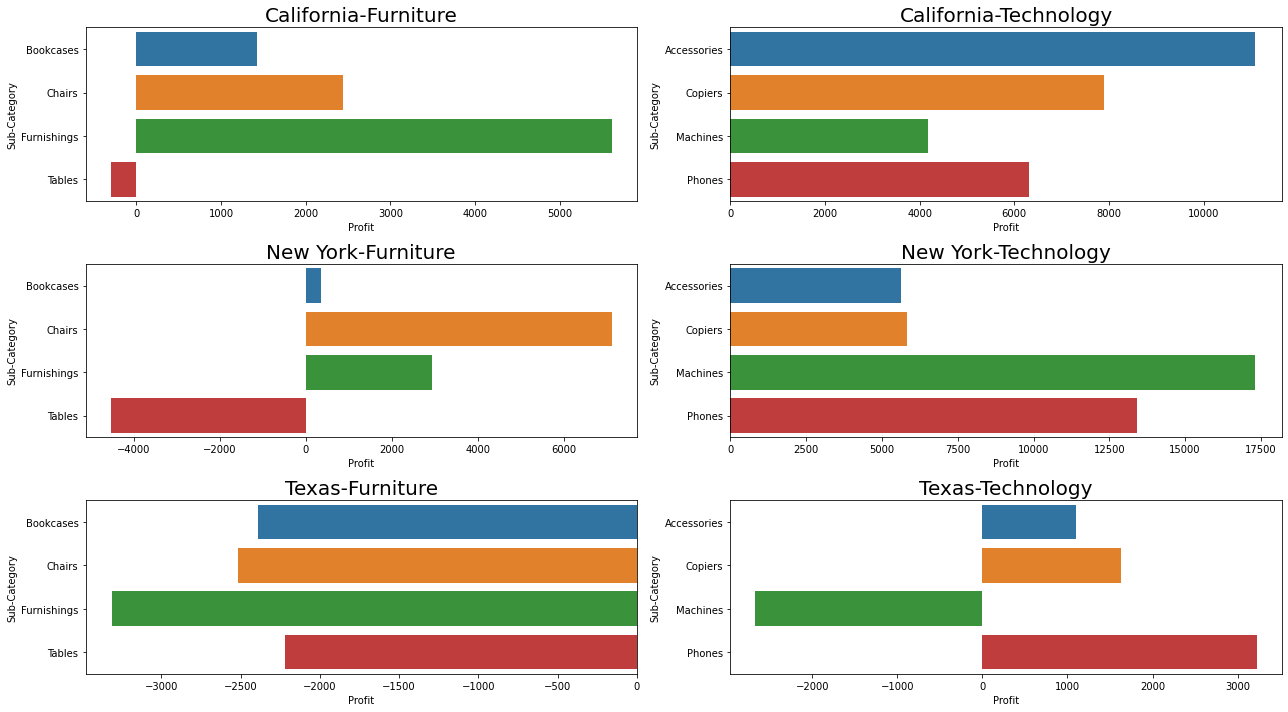

In [28]:
fig,axes=plt.subplots(3,2,figsize=(18,10))
axes[0,0].set_title('California-Furniture', fontsize=20)
state_data=data1.groupby(['State'])
sub_data=state_data.get_group('California').groupby(['Category'])
sub_data_f=sub_data.get_group('Furniture').groupby(['Sub-Category']).sum()
sns.barplot(x=sub_data_f.Profit,y=sub_data_f.index,ax=axes[0,0])

axes[0,1].set_title('California-Technology', fontsize=20)
state_data1=data1.groupby(['State'])
sub_data1=state_data1.get_group('California').groupby(['Category'])
sub_data_t=sub_data1.get_group('Technology').groupby(['Sub-Category']).sum()
sns.barplot(x=sub_data_t.Profit,y=sub_data_t.index,ax=axes[0,1])


axes[1,0].set_title('New York-Furniture', fontsize=20)
state_data2=data1.groupby(['State'])
sub_data2=state_data2.get_group('New York').groupby(['Category'])
sub_data_f1=sub_data2.get_group('Furniture').groupby(['Sub-Category']).sum()
sns.barplot(x=sub_data_f1.Profit,y=sub_data_f1.index,ax=axes[1,0])

axes[1,1].set_title('New York-Technology', fontsize=20)
state_data3=data1.groupby(['State'])
sub_data3=state_data3.get_group('New York').groupby(['Category'])
sub_data_t1=sub_data3.get_group('Technology').groupby(['Sub-Category']).sum()
sns.barplot(x=sub_data_t1.Profit,y=sub_data_t1.index,ax=axes[1,1])


axes[2,0].set_title('Texas-Furniture', fontsize=20)
state_data4=data1.groupby(['State'])
sub_data4=state_data4.get_group('Texas').groupby(['Category'])
sub_data_f2=sub_data4.get_group('Furniture').groupby(['Sub-Category']).sum()
sns.barplot(x=sub_data_f2.Profit,y=sub_data_f2.index,ax=axes[2,0])

axes[2,1].set_title('Texas-Technology', fontsize=20)
state_data5=data.groupby(['State'])
sub_data5=state_data5.get_group('Texas').groupby(['Category'])
sub_data_t2=sub_data5.get_group('Technology').groupby(['Sub-Category']).sum()
sns.barplot(x=sub_data_t2.Profit,y=sub_data_t2.index,ax=axes[2,1])

plt.tight_layout()
plt.show()



Analyzing technology and Furniture category in three different states.
From the above figure we get to know that highest profit comes from technology category in all three states, whereas the company is in loss from furniture category in all three 3 states.